In [1]:
# Import all libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [32]:
# Import Data

df = pd.read_excel('Train Ski Data.xlsx')
df.rename(columns = {'Temp High (°F)':'Temp High', 'Temp Low (°F)':'Temp Low', 'Temp High (°F)':'Temp High', 'Snowfall (inches)':'Snowfall', 'Wind (mph)':'Wind', 'Open Trails (%)':'Open Trails'}, inplace = True)  # Renaming columns 
print(df.head())
# sns.countplot(df['heart disease'])
# plt.title('Value counts of heart disease patients')
# plt.show()

        Date               Resort Name  Temp High  Temp Low  Snowfall  Wind  \
0 2024-04-13    Palisades Tahoe Resort       46.4      32.3       0.0  13.1   
1 2024-04-13   Mammoth Mountain Resort       27.5      27.5       0.0   2.1   
2 2024-04-13          Sugarbush Resort       35.8      24.6       0.0   6.4   
3 2024-04-13  Stratton Mountain Resort       60.8      58.2       0.0   9.6   
4 2024-04-13      Sugarloaf Ski Resort       41.2      25.5       0.0  13.1   

           Skies  Open Trails  (%)  Snow Conditions  Score  
0          Rainy                89  Machine Groomed     30  
1         Cloudy               100         Wet Snow     60  
2  Partly Cloudy                32    Packed Powder     50  
3          Rainy                46           Powder     10  
4          Rainy                87  Machine Groomed     40  


In [33]:
# Data Cleaning and Transformation
df_encoded = pd.get_dummies(df, columns=['Skies', 'Snow Conditions'])
df_encoded.head()

Date               Resort Name  Temp High  Temp Low  Snowfall  Wind  \
0 2024-04-13    Palisades Tahoe Resort       46.4      32.3       0.0  13.1   
1 2024-04-13   Mammoth Mountain Resort       27.5      27.5       0.0   2.1   
2 2024-04-13          Sugarbush Resort       35.8      24.6       0.0   6.4   
3 2024-04-13  Stratton Mountain Resort       60.8      58.2       0.0   9.6   
4 2024-04-13      Sugarloaf Ski Resort       41.2      25.5       0.0  13.1   

   Open Trails  (%)  Score  Skies_Cloudy  Skies_Partly Cloudy  Skies_Rainy  \
0                89     30         False                False         True   
1               100     60          True                False        False   
2                32     50         False                 True        False   
3                46     10         False                False         True   
4                87     40         False                False         True   

   Skies_Snowy  Skies_Sunny  Snow Conditions_Machine Groomed  \
0        False        False                             True   
1        False        False                            False   
2        False        False                            False   
3        False        False                            False   
4        False        False                             True   

   Snow Conditions_Packed Powder  Snow Conditions_Powder  \
0                          False                   False   
1                          False                   False   
2                           True                   False   
3                          False                    True   
4                          False                   False   

   Snow Conditions_Wet Snow  
0                     False  
1                      True  
2                     False  
3                     False  
4                     False

In [34]:
# EDA
df_encoded.describe()  # Key Stats

Date  Temp High   Temp Low   Snowfall       Wind  \
count                   90  90.000000  90.000000  90.000000  90.000000   
mean   2024-04-08 21:36:00  29.203333  19.172222   2.284444  10.003333   
min    2024-04-04 00:00:00   5.300000  -4.300000   0.000000   1.700000   
25%    2024-04-07 00:00:00  21.775000  11.000000   0.000000   6.950000   
50%    2024-04-09 00:00:00  29.000000  18.450000   0.000000   9.800000   
75%    2024-04-11 00:00:00  35.625000  26.825000   4.000000  13.100000   
max    2024-04-13 00:00:00  60.800000  58.200000  15.200000  20.100000   
std                    NaN  10.225364  12.054399   3.340454   4.363702   

       Open Trails  (%)       Score  
count         90.000000   90.000000  
mean          80.166667   59.111111  
min           32.000000   10.000000  
25%           70.000000   40.000000  
50%           87.000000   50.000000  
75%           93.000000   80.000000  
max          100.000000  100.000000  
std           16.523902   20.479886

<Axes: xlabel='Snowfall', ylabel='Score'>

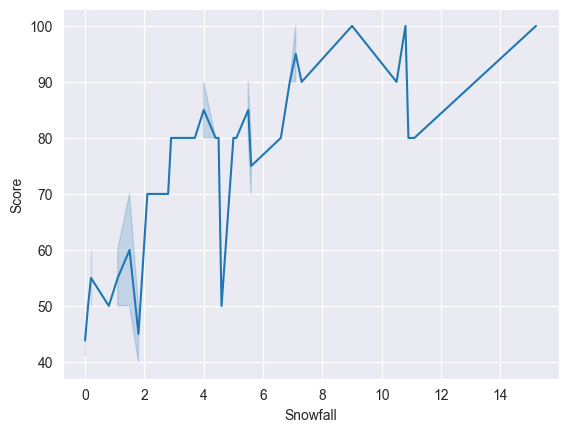

In [35]:
# Plotting
sns.lineplot(data=df, x="Snowfall", y="Score")


<Axes: xlabel='Wind', ylabel='Score'>

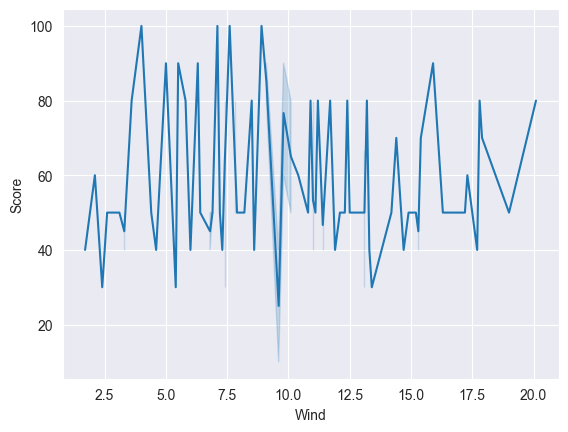

In [36]:
sns.lineplot(data=df, x="Wind", y="Score")

<Axes: xlabel='Skies', ylabel='Score'>

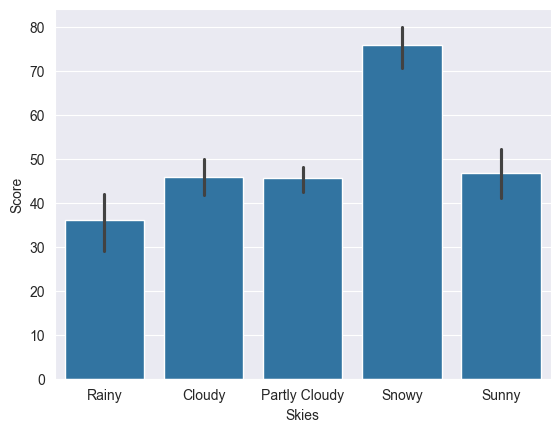

In [37]:
sns.barplot(data=df, x="Skies", y="Score")

In [38]:
# Model Building 1: Random Forest
# now lets split the data into train and test
from sklearn.model_selection import train_test_split

# Dropping Date as a variable
df_encoded = df_encoded.drop('Date', axis = 1)
df_encoded = df_encoded.drop('Resort Name', axis = 1)
df_encoded.head()
# Putting feature variable to X
X = df_encoded.drop('Score',axis=1)
# Putting response variable to y
y = df_encoded['Score']

# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)
X_train.shape, X_test.shape

((62, 14), (28, 14))

In [45]:
# Import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

classifier_rf = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=5,
                                       n_estimators=50, oob_score=True)


In [46]:
# Fit Model
classifier_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, n_estimators=50, n_jobs=-1, oob_score=True,
                       random_state=42)

In [47]:
# Check OOB score
classifier_rf.oob_score_

0.5161290322580645

In [48]:
# Hyperparameters Tuning
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10,25,30,50,100,200]
}

from sklearn.model_selection import GridSearchCV

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 180 candidates, totalling 720 fits


C:\Users\jay00\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 30, 50, 100, 200]},
             scoring='accuracy', verbose=1)

In [49]:
grid_search.best_score_

0.5645833333333333

In [50]:
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(max_depth=3, min_samples_leaf=5, n_estimators=10,
                       n_jobs=-1, random_state=42)

In [51]:
# Model 2: Linear Regression
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression().fit(X, y)
print(linear_model.coef_)
r_sq = linear_model.score(X, y)
print(f"coefficient of determination: {r_sq}")


[ -0.12773212   0.31923193   2.15776201  -0.51533899  -0.04194748
  -5.27203876  -4.28367793 -16.64098695  30.61596871  -4.41926506
  10.79374988 -14.80130747  -0.12257916   4.13013675]
coefficient of determination: 0.8536380252814644


In [52]:
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS
from sklearn.linear_model import LinearRegression

# Assuming X and y are already defined
best_lrmodel = LinearRegression()

# Define the feature selector
efs = EFS(best_lrmodel, 
          min_features=1, 
          max_features=len(X.columns), 
          scoring='r2', 
          print_progress=True, 
          cv=5)  # Change cv depending on your data

# Fit the model
efs = efs.fit(X, y)

# Best subset of features
best_feature_subset = list(efs.best_feature_names_)
print(best_feature_subset)


C:\Users\jay00\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
C:\Users\jay00\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
C:\Users\jay00\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
C:\Users\jay00\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
C:\U

['Snowfall', 'Wind', 'Skies_Rainy', 'Skies_Snowy', 'Snow Conditions_Packed Powder']


In [53]:
# Fit the model with the best subset of features
best_lrmodel.fit(X[best_feature_subset], y)
r_sq_b = best_lrmodel.score(X[best_feature_subset], y)
print(f"coefficient of determination: {r_sq_b}")
# Now 'model' is the Linear Regression model fitted with the best subset of features

coefficient of determination: 0.8420576973744753
